In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import koreanize_matplotlib

In [2]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip", 
    encoding="cp949")

df

,국가(대륙)별,상품군별,판매유형별,시점,데이터
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033
...,...,...,...,...,...
2767,기타,기 타,면세점 이외,2021.2/4,1278
2768,기타,기 타,면세점 이외,2021.3/4,1154
2769,기타,기 타,면세점 이외,2021.4/4,1076
2770,기타,기 타,면세점 이외,2022.1/4,2325


In [3]:
df.shape

(2772, 5)

In [4]:
df.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '시점', '데이터'], dtype='object')

In [5]:
df["국가(대륙)별"].unique()

array(['미국', '중국', '일본', '아세안(ASEAN)', '유럽연합(EU)', '중동', '중남미', '대양주',
       '기타'], dtype=object)

In [6]:
df["상품군별"].unique()

array(['컴퓨터 및 주변기기', '가전·전자·통신기기', '소프트웨어', '서 적', '사무·문구', '음반·비디오·악기',
       '의류 및 패션 관련상품', '스포츠·레저용품', '화장품', '아동·유아용품', '음·식료품', '농축수산물',
       '생활용품 및 자동차용품', '기 타'], dtype=object)

In [7]:
df["판매유형별"].unique()

array(['면세점 이외'], dtype=object)

In [8]:
df["시점"].unique()

array(['2017.1/4', '2017.2/4', '2017.3/4', '2017.4/4', '2018.1/4',
       '2018.2/4', '2018.3/4', '2018.4/4', '2019.1/4', '2019.2/4',
       '2019.3/4', '2019.4/4', '2020.1/4', '2020.2/4', '2020.3/4',
       '2020.4/4', '2021.1/4', '2021.2/4', '2021.3/4', '2021.4/4',
       '2022.1/4', '2022.2/4 p)'], dtype=object)

In [9]:
df["데이터"].unique()

array([1054,  946,  791, ..., 1076, 2325,  725], dtype=int64)

# Q1

In [10]:
# 출력 예시와 비교하며 어떻게 할 지 상상하기 위해 describe를 해보았다.
df.describe()

,데이터
count,2772.000000
mean,1613.116522
std,4273.426107
min,-10003.000000
25%,41.750000
50%,291.500000
75%,1181.000000
max,47689.000000


In [11]:
# 먼저 데이터 칼럼을 백만원으로 바꿔준다.
df.rename(columns = {"데이터": "백만원"}, inplace = True)
df

,국가(대륙)별,상품군별,판매유형별,시점,백만원
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033
...,...,...,...,...,...
2767,기타,기 타,면세점 이외,2021.2/4,1278
2768,기타,기 타,면세점 이외,2021.3/4,1154
2769,기타,기 타,면세점 이외,2021.4/4,1076
2770,기타,기 타,면세점 이외,2022.1/4,2325


In [12]:
# 출력 예시를 보면 연도가 계산된 것을 고려하여 시점을 연도로 바꾸기 위한 연산
df["시점"].map(lambda x : x.split(".")[0])

0       2017
1       2017
2       2017
3       2017
4       2018
        ... 
2767    2021
2768    2021
2769    2021
2770    2022
2771    2022
Name: 시점, Length: 2772, dtype: object

In [13]:
# 계산이 되기 위해 int로 바꾸어 주고 
# 새로운 칼럼으로 지정해준다.
df["연도"] = df["시점"].map(lambda x : int(x.split(".")[0]))
df

,국가(대륙)별,상품군별,판매유형별,시점,백만원,연도
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018
...,...,...,...,...,...,...
2767,기타,기 타,면세점 이외,2021.2/4,1278,2021
2768,기타,기 타,면세점 이외,2021.3/4,1154,2021
2769,기타,기 타,면세점 이외,2021.4/4,1076,2021
2770,기타,기 타,면세점 이외,2022.1/4,2325,2022


In [14]:
# 같은 방식으로 분기도 구해주기 위한 연산을 해본다.
df["시점"].map(lambda x : x.split(".")[1].split("/")[0])

0       1
1       2
2       3
3       4
4       1
       ..
2767    2
2768    3
2769    4
2770    1
2771    2
Name: 시점, Length: 2772, dtype: object

In [15]:
df["분기"] = df["시점"].map(lambda x : int(x.split(".")[1].split("/")[0]))
df

,국가(대륙)별,상품군별,판매유형별,시점,백만원,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1
...,...,...,...,...,...,...,...
2767,기타,기 타,면세점 이외,2021.2/4,1278,2021,2
2768,기타,기 타,면세점 이외,2021.3/4,1154,2021,3
2769,기타,기 타,면세점 이외,2021.4/4,1076,2021,4
2770,기타,기 타,면세점 이외,2022.1/4,2325,2022,1


In [16]:
# 소수점을 고쳐보고 싶었으나 패스,,
df.describe().round()

,백만원,연도,분기
count,2772.0,2772.0,2772.0
mean,1613.0,2019.0,2.0
std,4273.0,2.0,1.0
min,-10003.0,2017.0,1.0
25%,42.0,2018.0,1.0
50%,292.0,2019.0,2.0
75%,1181.0,2021.0,3.0
max,47689.0,2022.0,4.0


* 적자가 난 적도 있었구나 싶다.

# Q2

In [17]:
# 찝찝해서 copy로 새로 만들어주었다.
df_copy = df.copy()
df_copy

,국가(대륙)별,상품군별,판매유형별,시점,백만원,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1
...,...,...,...,...,...,...,...
2767,기타,기 타,면세점 이외,2021.2/4,1278,2021,2
2768,기타,기 타,면세점 이외,2021.3/4,1154,2021,3
2769,기타,기 타,면세점 이외,2021.4/4,1076,2021,4
2770,기타,기 타,면세점 이외,2022.1/4,2325,2022,1


In [18]:
# 피봇테이블로 구해주었다.
result = df_copy.pivot_table(index="국가(대륙)별", columns="연도", values="백만원", aggfunc="sum")
result

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571,36141,40950,44438,57959,19501
대양주,18989,17520,13191,16255,16841,5044
미국,142292,156312,186617,255384,277579,103416
아세안(ASEAN),66163,76450,82930,105360,94150,38072
유럽연합(EU),31068,36826,39008,39865,32349,9019
일본,125442,178094,189330,220730,280029,131771
중국,167240,182068,210418,289446,194380,98572
중남미,10245,11669,12981,12563,8298,2629
중동,8030,8019,9325,11467,6164,1389


# Q3

In [19]:
# 2020년도만 남긴다.
# 처음에 int 라는 거를 까먹고 ""안에 넣어서 하다가 안돌아가서 헤맸다...
result.drop(columns = [2017, 2018, 2019, 2021, 2022])

연도,2020
국가(대륙)별,
기타,44438
대양주,16255
미국,255384
아세안(ASEAN),105360
유럽연합(EU),39865
일본,220730
중국,289446
중남미,12563
중동,11467


# Q4

In [20]:
# 국가가 뭐있더라 한 번 봤다.
df["국가(대륙)별"].unique()

array(['미국', '중국', '일본', '아세안(ASEAN)', '유럽연합(EU)', '중동', '중남미', '대양주',
       '기타'], dtype=object)

In [21]:
# 온라인 직접 판매액이 높은 지역은 "미국", "중국", "일본"
# 주요 판매 상품군은 "의류 및 패션 관련상품", "화장품", "음반·비디오·악기"

# 원래는 한 번에 지우려고 했는데 []로 묶어도 보고 따로 리스트를 만들어야 하나 고민하다가
# 다 안돼서 한 개만 빼기 해봤는데 되었다.

df_1=df[df["국가(대륙)별"] != "아세안(ASEAN)"]
df_1

,국가(대륙)별,상품군별,판매유형별,시점,백만원,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1
...,...,...,...,...,...,...,...
2767,기타,기 타,면세점 이외,2021.2/4,1278,2021,2
2768,기타,기 타,면세점 이외,2021.3/4,1154,2021,3
2769,기타,기 타,면세점 이외,2021.4/4,1076,2021,4
2770,기타,기 타,면세점 이외,2022.1/4,2325,2022,1


In [22]:
# 실제로 아세안이 빠졌다.
df_1["국가(대륙)별"].unique()

array(['미국', '중국', '일본', '유럽연합(EU)', '중동', '중남미', '대양주', '기타'],
      dtype=object)

In [23]:
# 그래서 하나하나 다 뺴주었고 변수명은 마지막꺼만 중요하다 생각해서 마지막만 신경썼다.

df_2=df_1[df_1["국가(대륙)별"] != "유럽연합(EU)"]
df_2=df_2[df_2["국가(대륙)별"] != "중동"]
df_2=df_2[df_2["국가(대륙)별"] != "중남미"]
df_2=df_2[df_2["국가(대륙)별"] != "대양주"]
df_3country=df_2[df_2["국가(대륙)별"] != "기타"]
df_3country

,국가(대륙)별,상품군별,판매유형별,시점,백만원,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1
...,...,...,...,...,...,...,...
919,일본,기 타,면세점 이외,2021.2/4,10843,2021,2
920,일본,기 타,면세점 이외,2021.3/4,9616,2021,3
921,일본,기 타,면세점 이외,2021.4/4,10435,2021,4
922,일본,기 타,면세점 이외,2022.1/4,8967,2022,1


In [24]:
# 잘 되었음을 확인
df_2["국가(대륙)별"].unique()

array(['미국', '중국', '일본', '기타'], dtype=object)

In [25]:
# 같은 방식..
df_3country["상품군별"].unique()

array(['컴퓨터 및 주변기기', '가전·전자·통신기기', '소프트웨어', '서 적', '사무·문구', '음반·비디오·악기',
       '의류 및 패션 관련상품', '스포츠·레저용품', '화장품', '아동·유아용품', '음·식료품', '농축수산물',
       '생활용품 및 자동차용품', '기 타'], dtype=object)

In [26]:
d = df_3country[df_3country["상품군별"] != "컴퓨터 및 주변기기"]
d = d[d["상품군별"] != "가전·전자·통신기기"]
d = d[d["상품군별"] != "소프트웨어"]
d = d[d["상품군별"] != "서 적"]
d = d[d["상품군별"] != "사무·문구"]
d = d[d["상품군별"] != "스포츠·레저용품"]
d = d[d["상품군별"] != "아동·유아용품"]
d = d[d["상품군별"] != "음·식료품"]
d = d[d["상품군별"] != "농축수산물"]
d = d[d["상품군별"] != "생활용품 및 자동차용품"]
df_country = d[d["상품군별"] != "기 타"]
df_country

,국가(대륙)별,상품군별,판매유형별,시점,백만원,연도,분기
110,미국,음반·비디오·악기,면세점 이외,2017.1/4,1922,2017,1
111,미국,음반·비디오·악기,면세점 이외,2017.2/4,1778,2017,2
112,미국,음반·비디오·악기,면세점 이외,2017.3/4,2281,2017,3
113,미국,음반·비디오·악기,면세점 이외,2017.4/4,2647,2017,4
114,미국,음반·비디오·악기,면세점 이외,2018.1/4,2362,2018,1
...,...,...,...,...,...,...,...
809,일본,화장품,면세점 이외,2021.2/4,18768,2021,2
810,일본,화장품,면세점 이외,2021.3/4,23380,2021,3
811,일본,화장품,면세점 이외,2021.4/4,22555,2021,4
812,일본,화장품,면세점 이외,2022.1/4,26664,2022,1


In [27]:
# 잘 되었다.
df_country["상품군별"].unique()

array(['음반·비디오·악기', '의류 및 패션 관련상품', '화장품'], dtype=object)

<Figure size 1500x400 with 0 Axes>

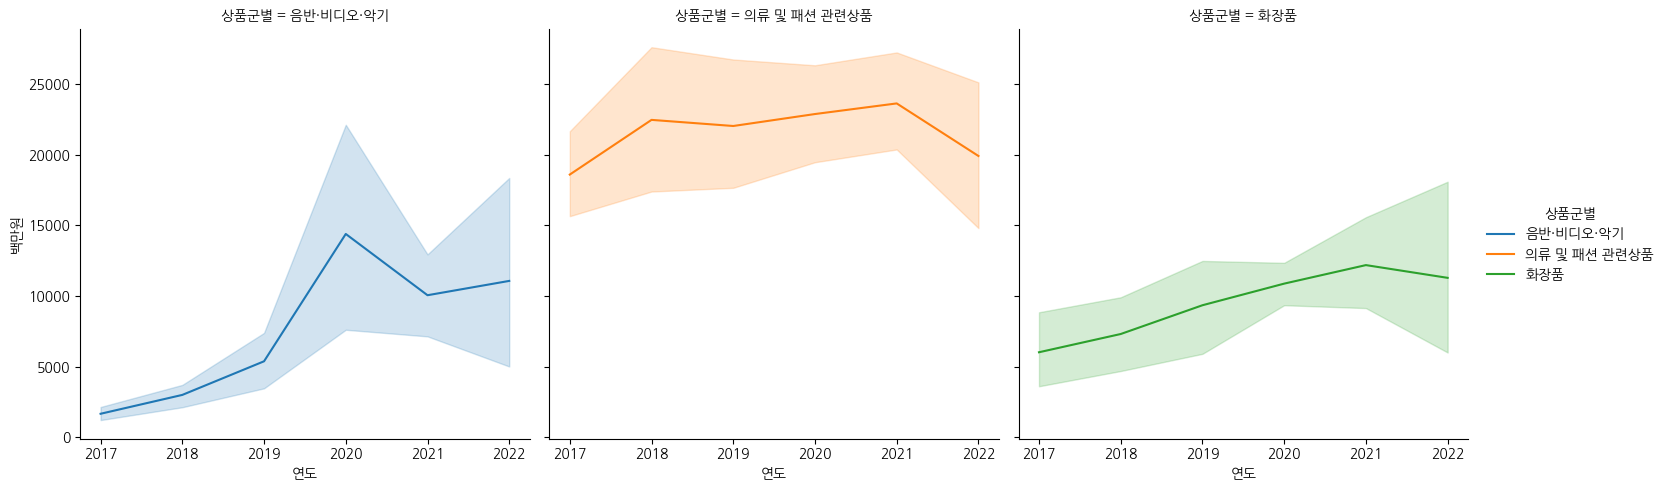

In [29]:
# 시각화를 해주었는데, 찝찝하다.

plt.figure(figsize = (15,4))
sns.relplot(data=df_country, x="연도", y="백만원", hue= "상품군별", kind="line",
           col="상품군별", col_wrap=3)